# Auto-encoder (three-layered CNN) training on MNIST
Almost directly from from-tensorflow.ipynb in the Nengo github, we can modify this network like adding new layers or training on new datasets.

## Import libraries

In [9]:
%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sklearn

## define network

In [10]:
n_in = 784
n_hidden = 64
minibatch_size = 50

# input
tf_a = tf.keras.Input(shape=(n_in,))

# first layer
tf_b = tf.keras.layers.Dense(
    n_hidden, activation=tf.nn.relu,
    kernel_initializer=tf.initializers.glorot_uniform()
)(tf_a)

# second layer
tf_c = tf.keras.layers.Dense(
    n_in, activation=tf.nn.relu,
    kernel_initializer=tf.initializers.glorot_uniform()
)(tf_b)

In [24]:
# download MNIST dataset
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.mnist.load_data()
# flatten images
train_data = train_data.reshape((train_data.shape[0], -1))
test_data = test_data.reshape((test_data.shape[0], -1))

n_epochs = 2

Traing the model

In [12]:
model = tf.keras.Model(inputs=tf_a, outputs=tf_c)
model.compile(optimizer=tf.optimizers.RMSprop(1e-3), 
              loss=tf.losses.mse)

# run training loop
model.fit(train_data, train_data, epochs=n_epochs)

# evaluate performance on test set
print("Test error:", model.evaluate(test_data, test_data))

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 1283.3424
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 915.3912
Test error: 915.3911743164062


## display example output and input

Text(0.5, 1.0, 'example input')

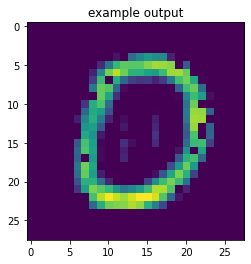

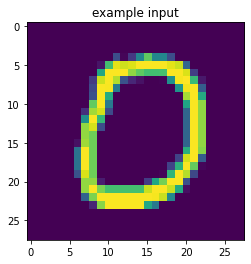

In [14]:
no_fig = 10
output = model.predict(test_data[[no_fig]])
plt.figure()
plt.imshow(output[0].reshape((28, 28)));
plt.title('example output')
plt.figure()
plt.imshow(test_data[no_fig].reshape((28, 28)))
plt.title('example input')

## get hidden variable activity

In [22]:
model_hide = tf.keras.Model(inputs=tf_a, outputs=tf_b)
hid_layer_output = model_hide.predict(test_data)

## perform k-means

In [23]:
k_means_10 = sklearn.cluster.KMeans(n_clusters=10).fit(hid_layer_output)


In [25]:
label_predict = k_means_10.predict(hid_layer_output)
ari = sklearn.metrics.adjusted_rand_score(test_label, label_predict)
print(f"Adjusted Rand index = {ari}")
mutual_info = sklearn.metrics.adjusted_mutual_info_score(test_label, label_predict)
print(f"Adjusted Mutual information = {mutual_info}")

Adjusted Rand index = 0.2907722179636622
Adjusted Mutual information = 0.4359284728561129


## Why not train another model from hidden layers ouput to test_label?